In [1]:
import json
import pandas as pd

In [2]:
with open('../data/ChristmasCarol/coref_merge_map.json') as f:
    coref_map = json.load(f)

quotes_df = pd.read_csv('../data/ChristmasCarol/character-tagging/ChristmasCarol.quotes', delimiter='\t')
entities_df = pd.read_csv('../data/ChristmasCarol/processed_characters.csv')

In [3]:
quotes_df

,quote_start,quote_end,mention_start,mention_end,mention_phrase,char_id,quote
0,1,2,30,31,the clerk,77,'S GHOST
1,52,74,46,46,Scrooge,20,' Change for anything he chose to put his hand...
2,694,697,692,692,They,103,' came down '
3,719,736,705,705,Nobody,104,"' My dear Scrooge , how are you ? When will yo..."
4,819,834,816,816,they,110,"' No eye at all is better than an evil eye , d..."
...,...,...,...,...,...,...,...
715,35486,35498,35500,35500,Scrooge,20,"' Now , I 'll tell you what , my friend , '"
716,35502,35519,35520,35520,he,20,' I am not going to stand this sort of thing a...
717,35554,35554,35555,35555,Bob,54,'
718,35598,35605,35607,35607,Scrooge,20,"' A merry Christmas , Bob ! '"


In [4]:
from typing import List, Set
from dataclasses import dataclass


@dataclass
class Quote:
    text: str
    speaker_id: int


@dataclass
class Dialogue:
    start_token: int
    end_token: int
    quotes: List[Quote]
    involved_characters: Set[int]


dialogue_join_threshold_tokens = 150


dialogues = []

for i, row in quotes_df.iterrows():

    if i == 0 or row.quote_start - dialogues[-1].end_token > dialogue_join_threshold_tokens:
        dialogues.append(Dialogue(start_token=row.quote_start, end_token=row.quote_end, quotes=list(), involved_characters=set()))
    
    dialogues[-1].end_token = row.quote_end
    dialogues[-1].quotes.append(Quote(text=row.quote, speaker_id=row.char_id))
    dialogues[-1].involved_characters.add(row.char_id)

len(dialogues) and dialogues[1]

Dialogue(start_token=694, end_token=877, quotes=[Quote(text="' came down '", speaker_id=103), Quote(text="' My dear Scrooge , how are you ? When will you come to see me ? '", speaker_id=104), Quote(text="' No eye at all is better than an evil eye , dark master ! '", speaker_id=110), Quote(text="' nuts '", speaker_id=113)], involved_characters={104, 113, 110, 103})

In [5]:
entities_df

,Unnamed: 0,COREF,start_token,end_token,prop,cat,text,character_name
0,0,14,0,3,PROP,PER,MARLEY 'S GHOST Marley,MARLEY 'S GHOST Marley
1,6,20,41,41,PROP,PER,Scrooge,Mr. Ebenezer Scrooge
2,7,20,46,46,PROP,PER,Scrooge,Mr. Ebenezer Scrooge
3,8,20,56,56,PRON,PER,he,Mr. Ebenezer Scrooge
4,9,20,60,60,PRON,PER,his,Mr. Ebenezer Scrooge
...,...,...,...,...,...,...,...,...
1970,4729,58,35876,35876,PRON,PER,He,poor Tiny Tim
1971,4730,66,35882,35882,PROP,PER,Spirits,THE SPIRITS The Phantom
1972,4731,58,35901,35901,PRON,PER,him,poor Tiny Tim
1973,4732,58,35903,35903,PRON,PER,he,poor Tiny Tim


In [6]:
char_id_lookup = {row.COREF: row.character_name for i, row in entities_df.iterrows()}
char_id_lookup.update({key: char_id_lookup[val] for key, val in coref_map.items() if val in char_id_lookup})
char_id_lookup_reverse = {val: key for key, val in char_id_lookup.items()}
char_id_lookup

{14: "MARLEY 'S GHOST Marley",
 20: 'Mr. Ebenezer Scrooge',
 16: 'Old Jacob Marley',
 21: 'Mr. Marley',
 34: 'Good Spirit',
 43: 'Mrs. Fezziwig',
 54: 'Bob Cratchit',
 55: 'Mrs. Cratchit',
 57: 'Master Peter Cratchit',
 58: 'poor Tiny Tim',
 59: "Martha warn't",
 63: 'Fred',
 64: 'Topper',
 66: 'THE SPIRITS The Phantom',
 69: 'Joe Miller'}

In [7]:
character_of_interest = 'Mr. Ebenezer Scrooge'

del_idxs = []
filtered_dialogues = [dialogue for dialogue in dialogues if char_id_lookup_reverse[character_of_interest] in dialogue.involved_characters]
len(filtered_dialogues)

31

In [8]:
other_characters = set()
for dialogue in filtered_dialogues:
    other_characters = other_characters.union(dialogue.involved_characters)

other_characters.remove(char_id_lookup_reverse[character_of_interest])
other_characters

{0,
 14,
 16,
 34,
 43,
 54,
 55,
 57,
 58,
 63,
 69,
 70,
 77,
 130,
 133,
 135,
 136,
 143,
 155,
 156,
 209,
 273,
 275,
 277,
 290,
 387,
 390,
 393,
 399,
 400,
 401,
 408,
 411,
 439,
 442,
 503,
 504,
 506,
 519,
 543,
 544,
 555,
 586,
 602,
 633,
 657,
 768,
 890,
 891,
 892,
 893,
 894,
 895,
 896,
 897,
 898,
 902,
 913,
 915,
 941,
 957,
 961,
 969,
 979,
 997,
 1002,
 1006,
 1018,
 1025,
 1048,
 1054,
 1071,
 1090,
 1110,
 1115,
 1205,
 1245,
 1306,
 1438}

In [9]:
filtered_other_characters = [char_id_lookup[char] for char in other_characters if char in char_id_lookup]
filtered_other_characters

["MARLEY 'S GHOST Marley",
 'Old Jacob Marley',
 'Good Spirit',
 'Mrs. Fezziwig',
 'Bob Cratchit',
 'Mrs. Cratchit',
 'Master Peter Cratchit',
 'poor Tiny Tim',
 'Fred',
 'Joe Miller']

In [10]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (25., 10.)

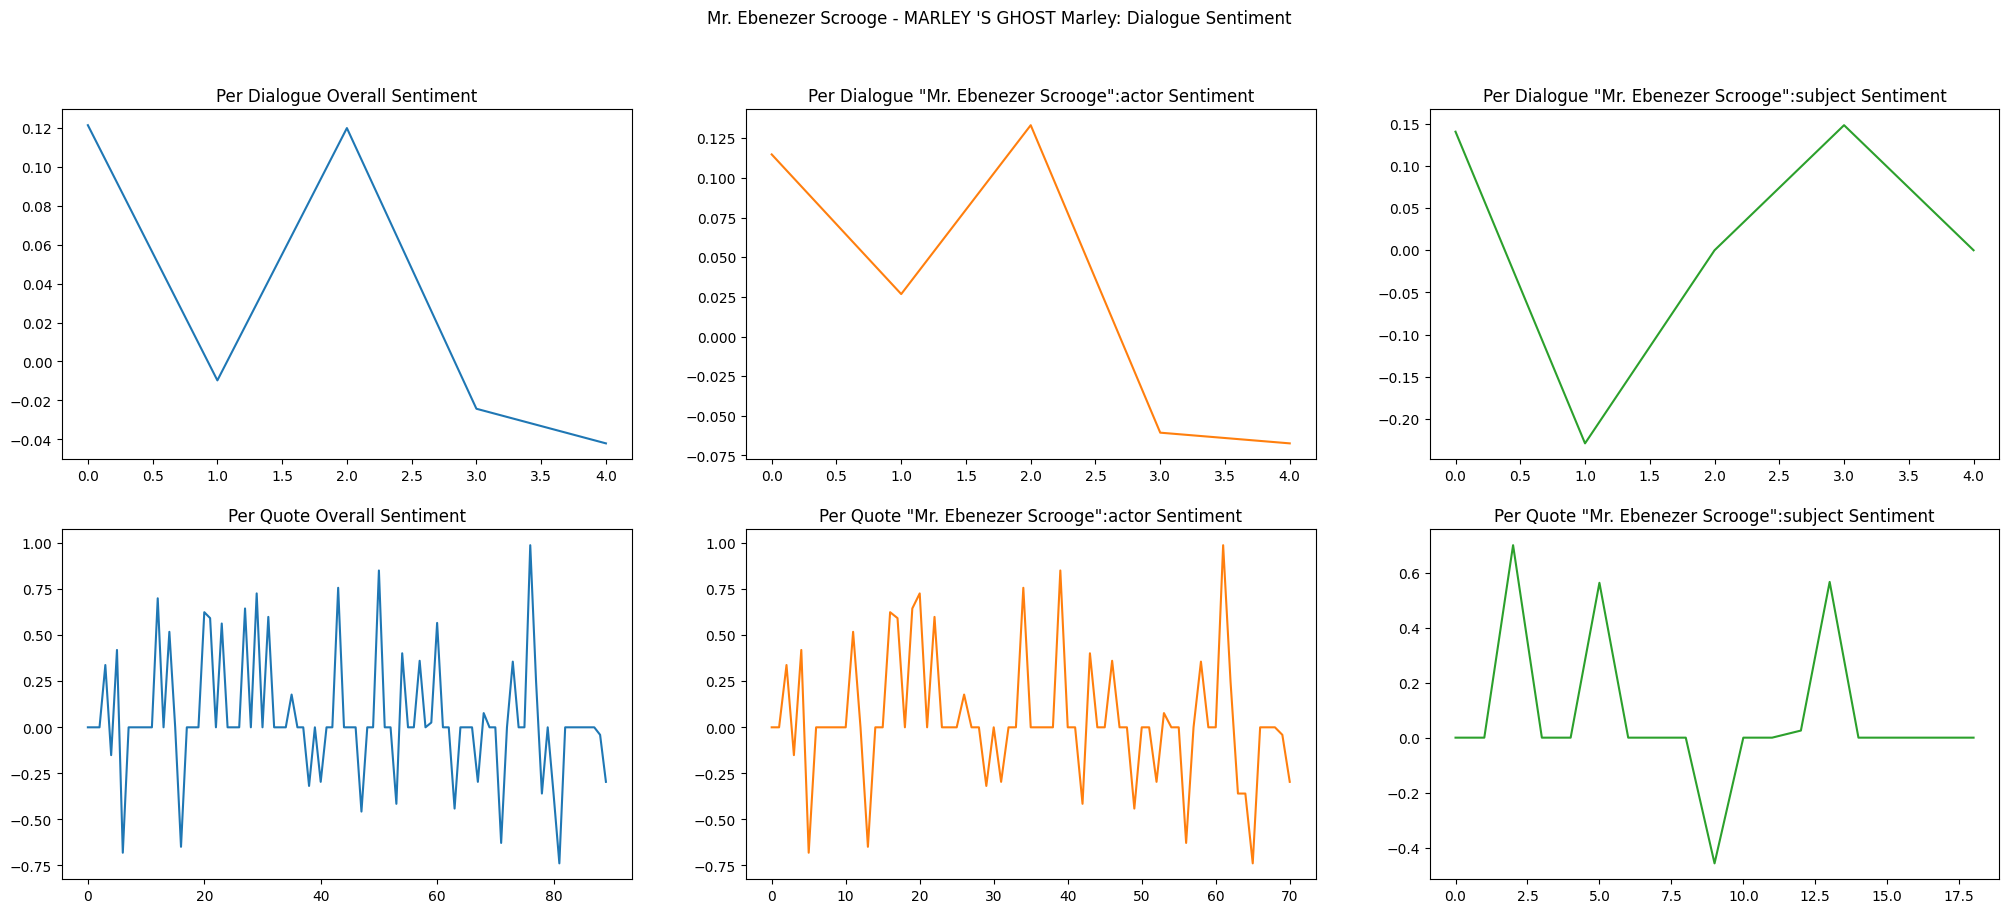

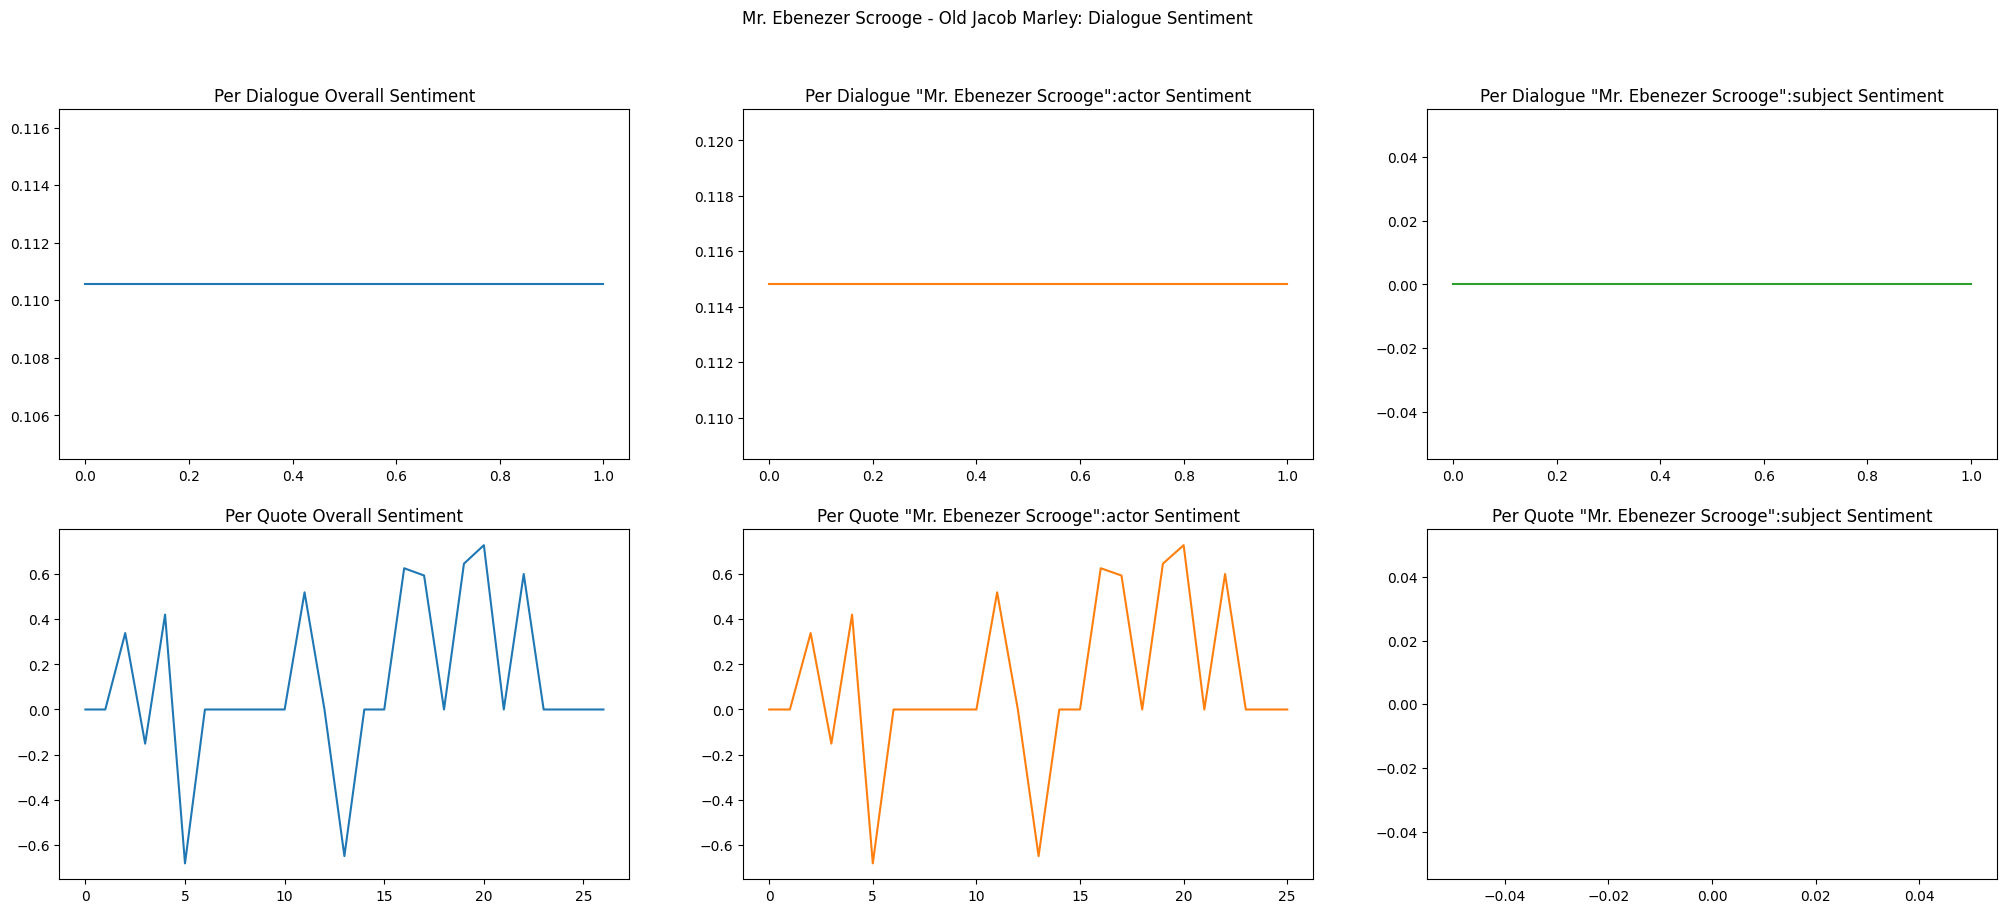

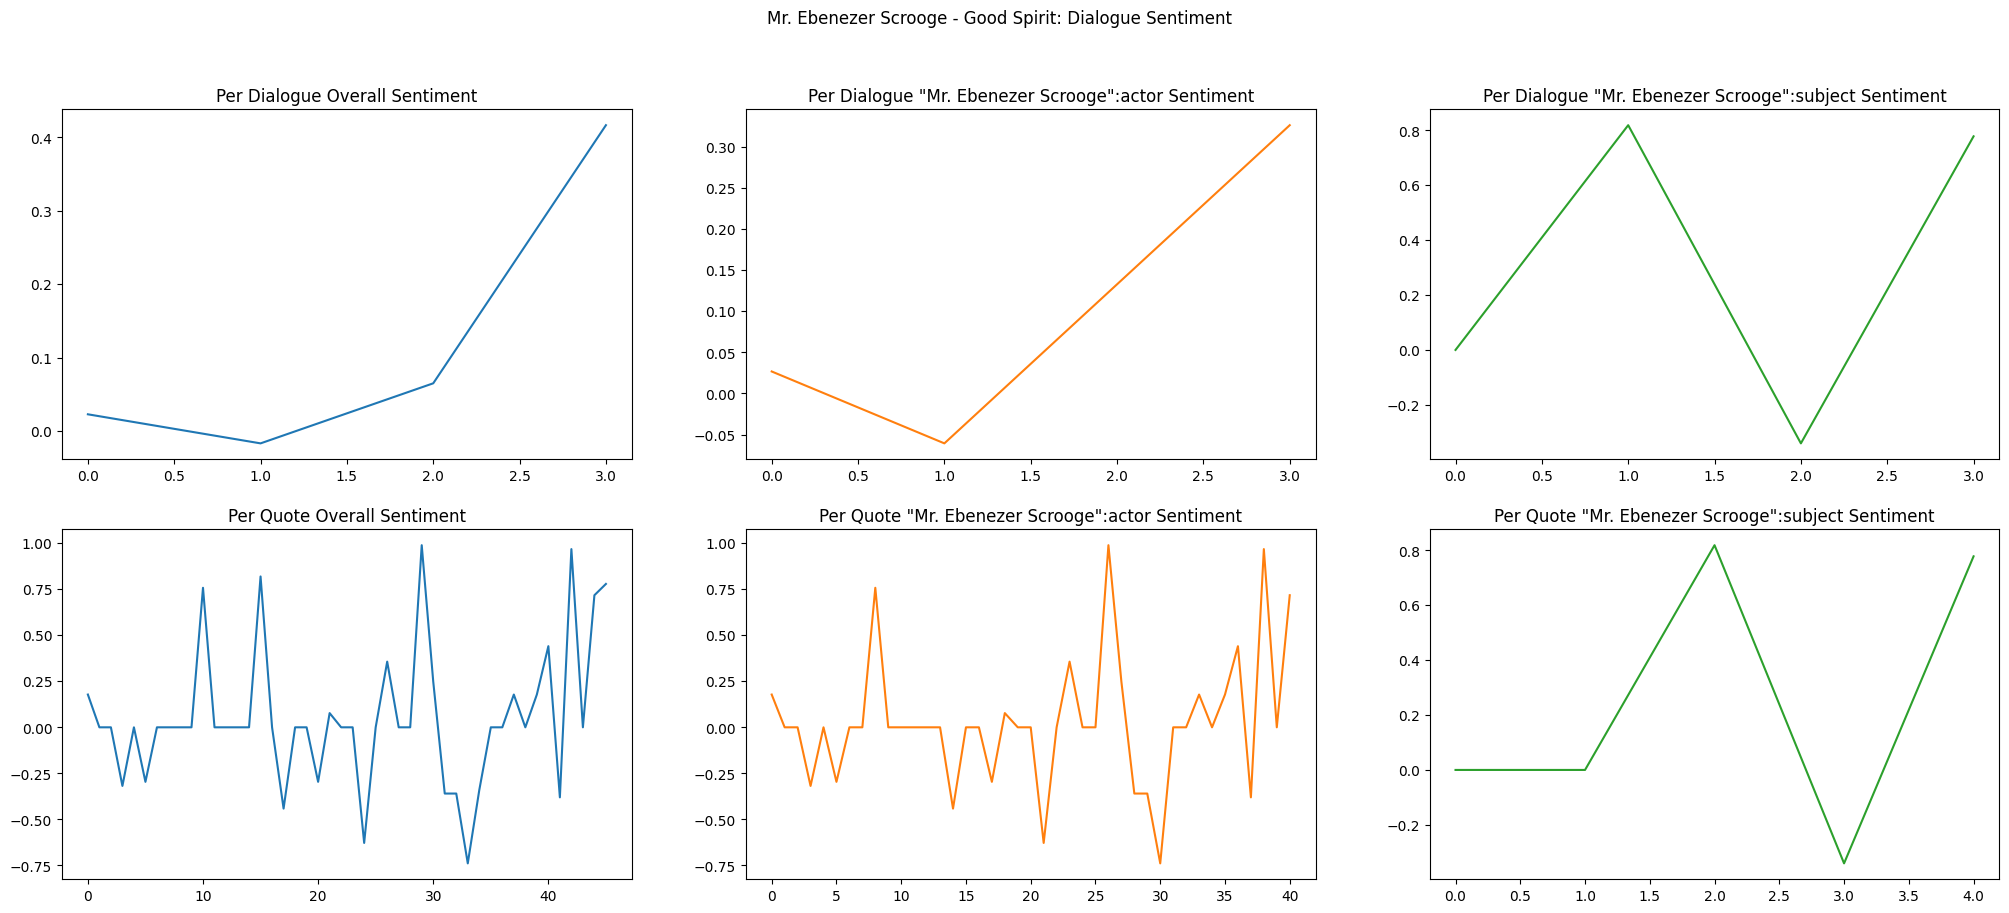

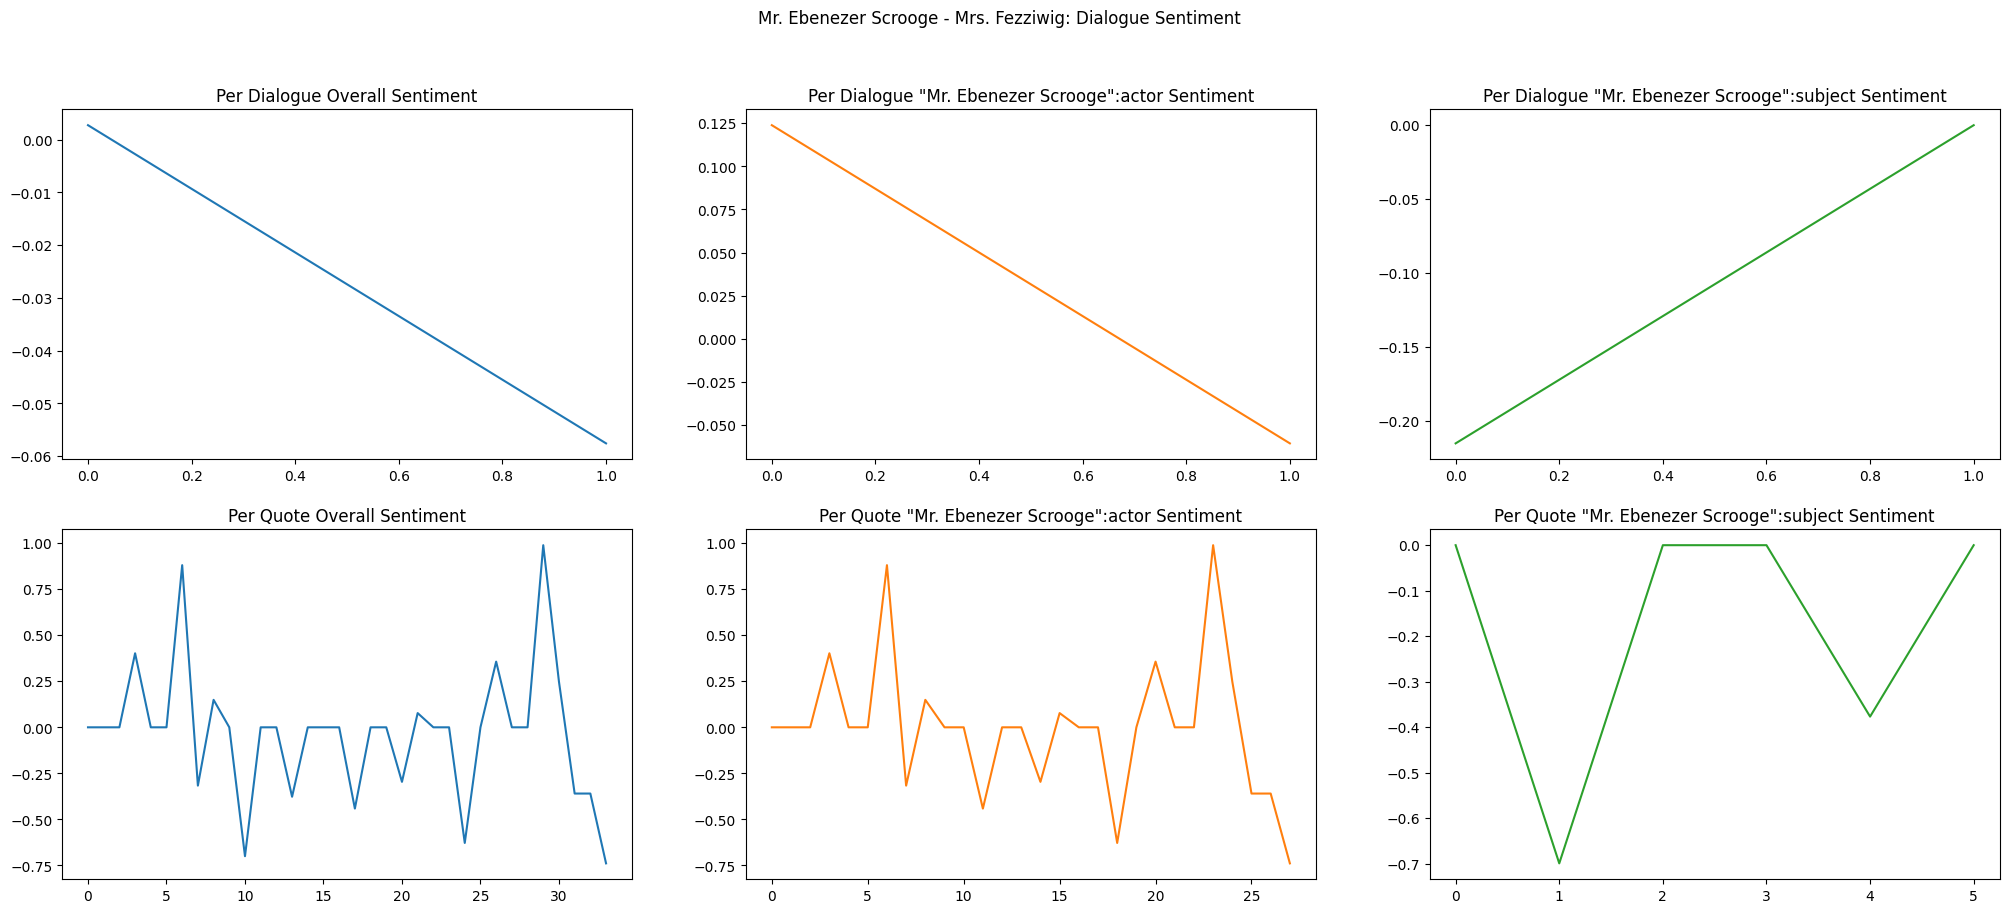

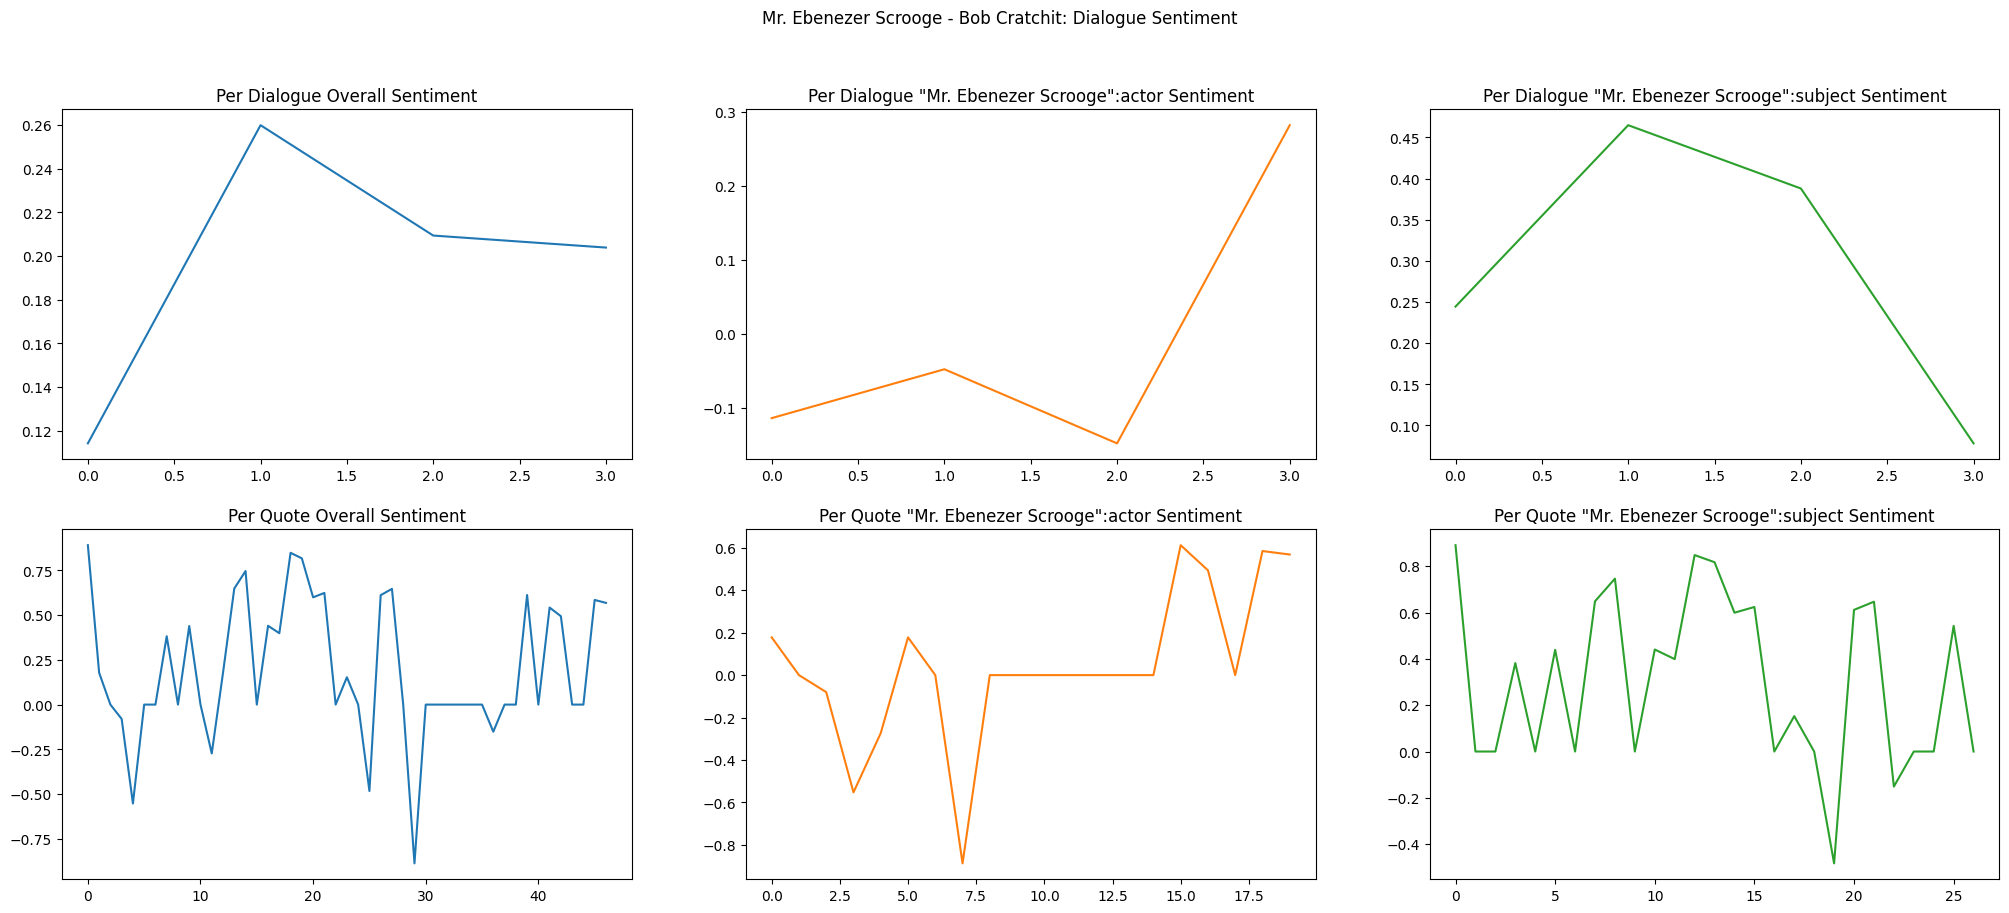

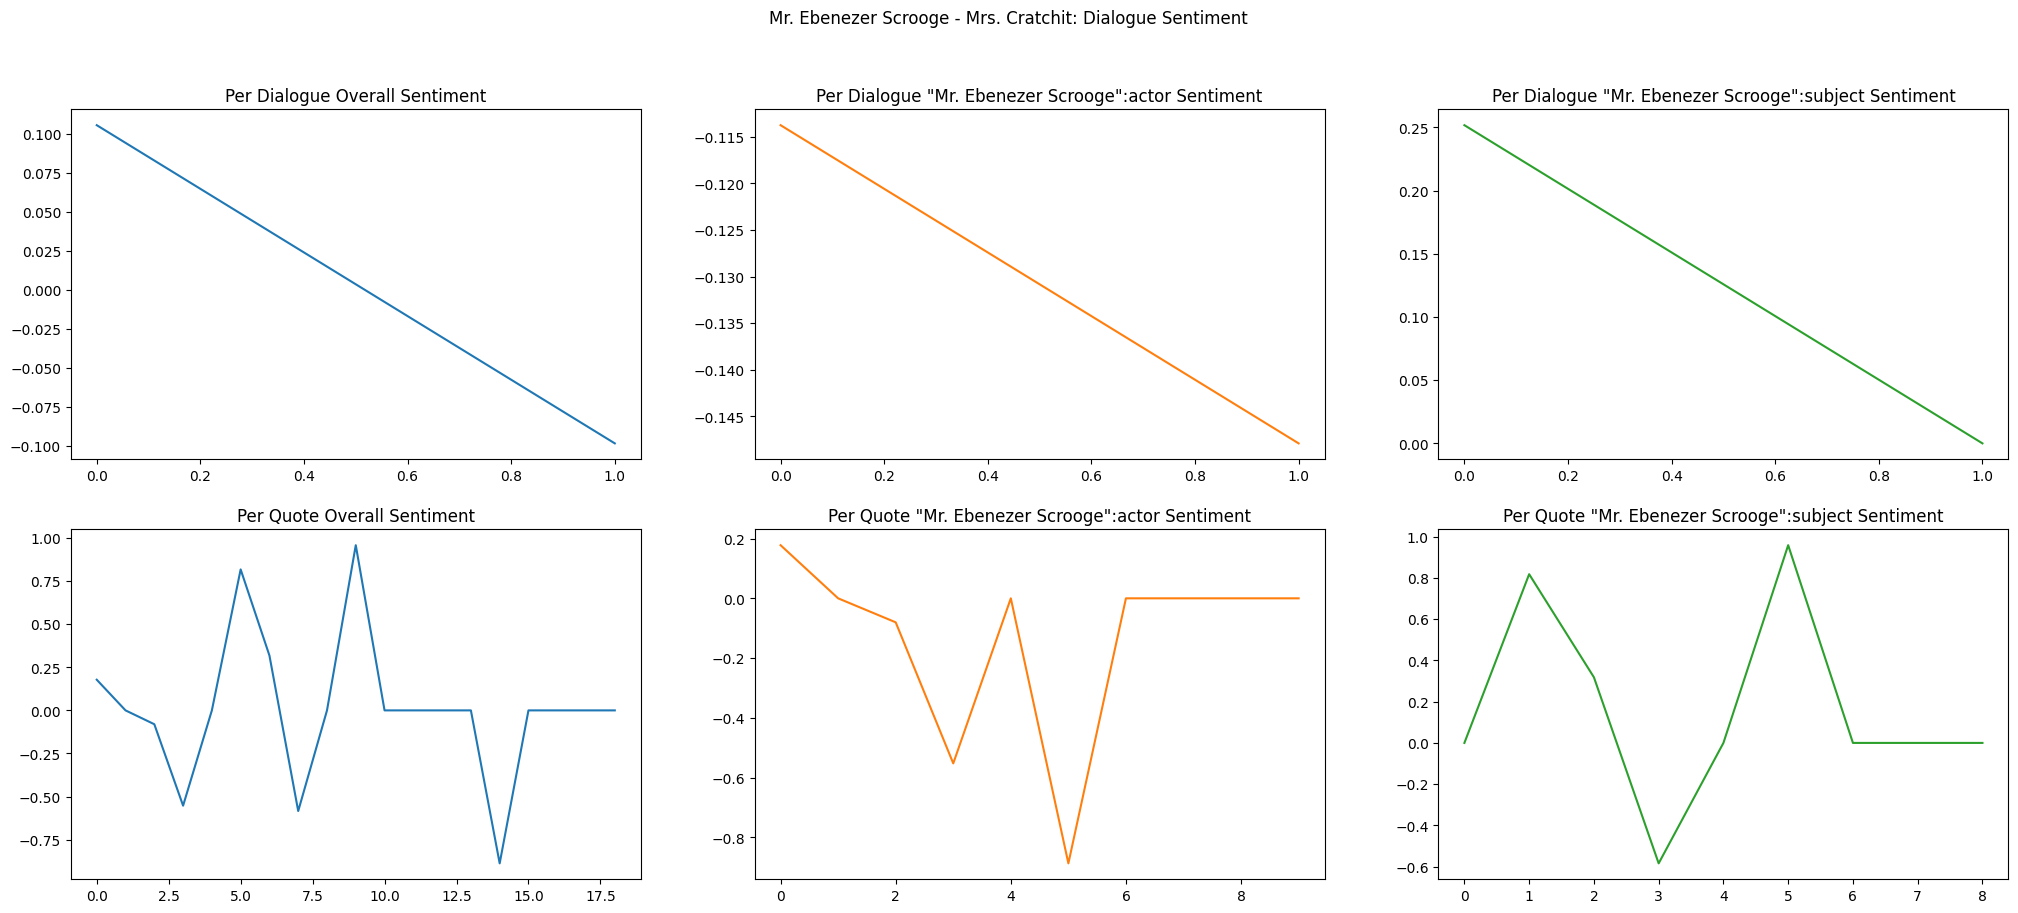

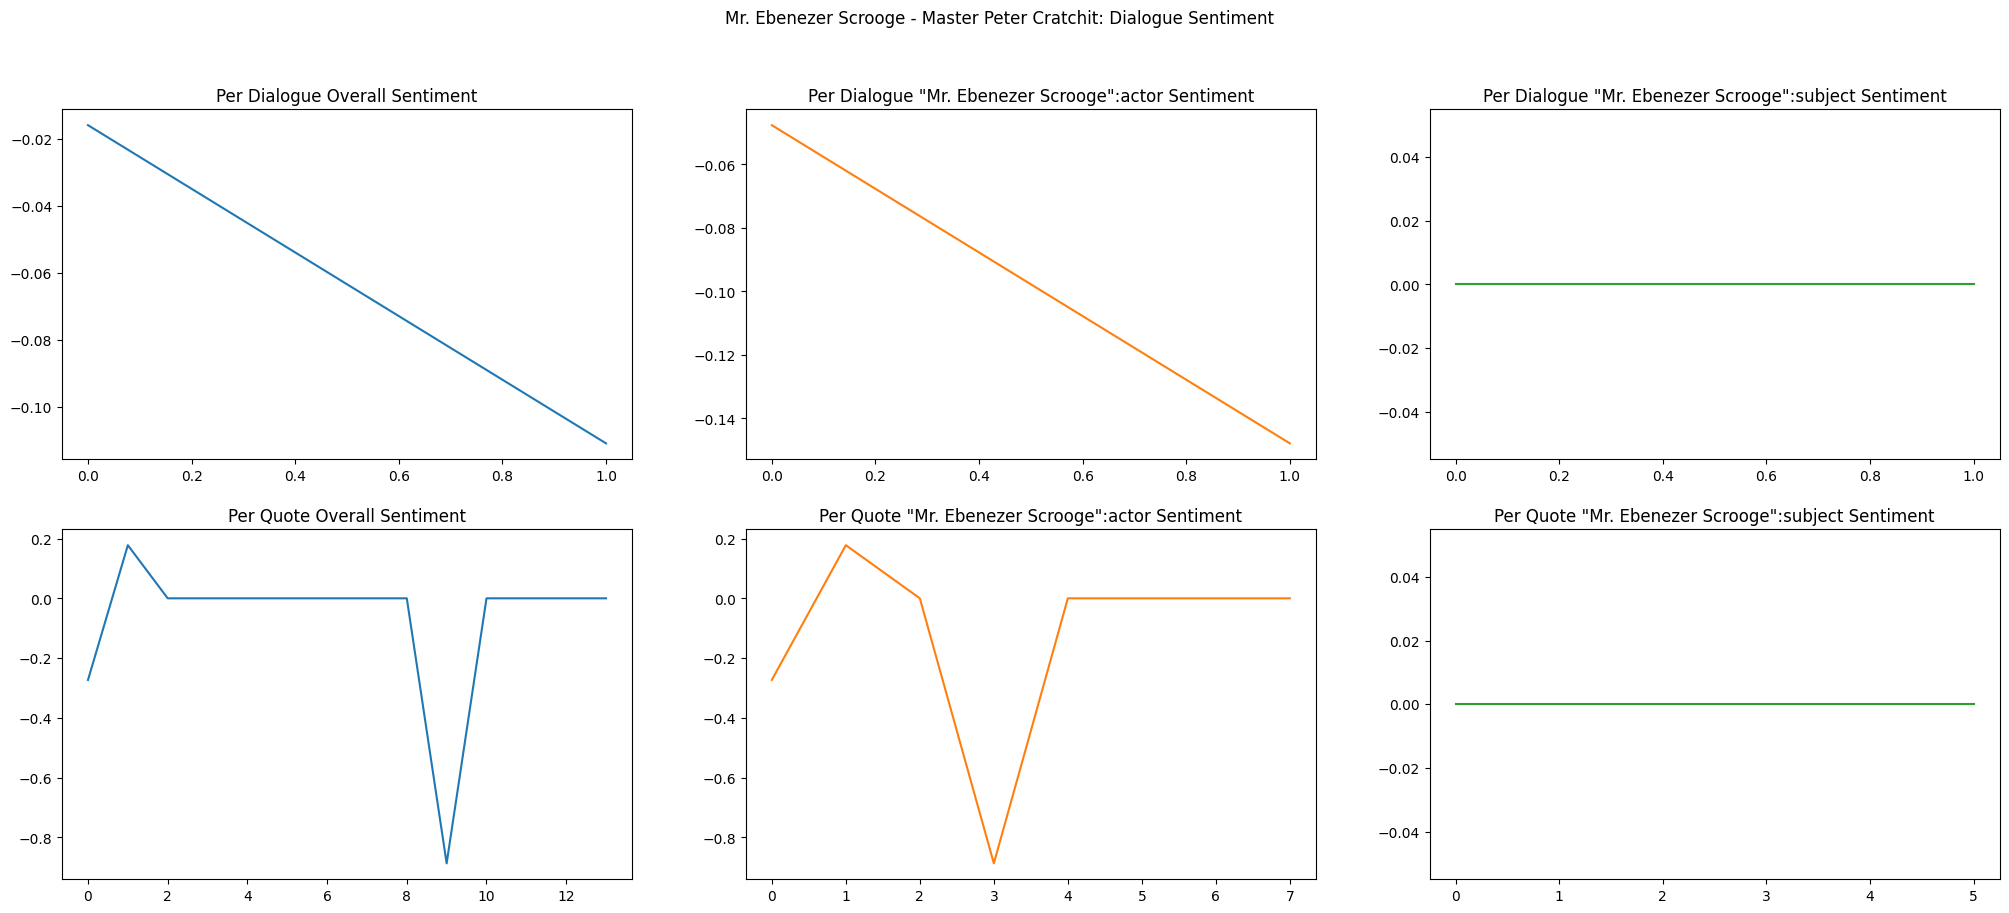

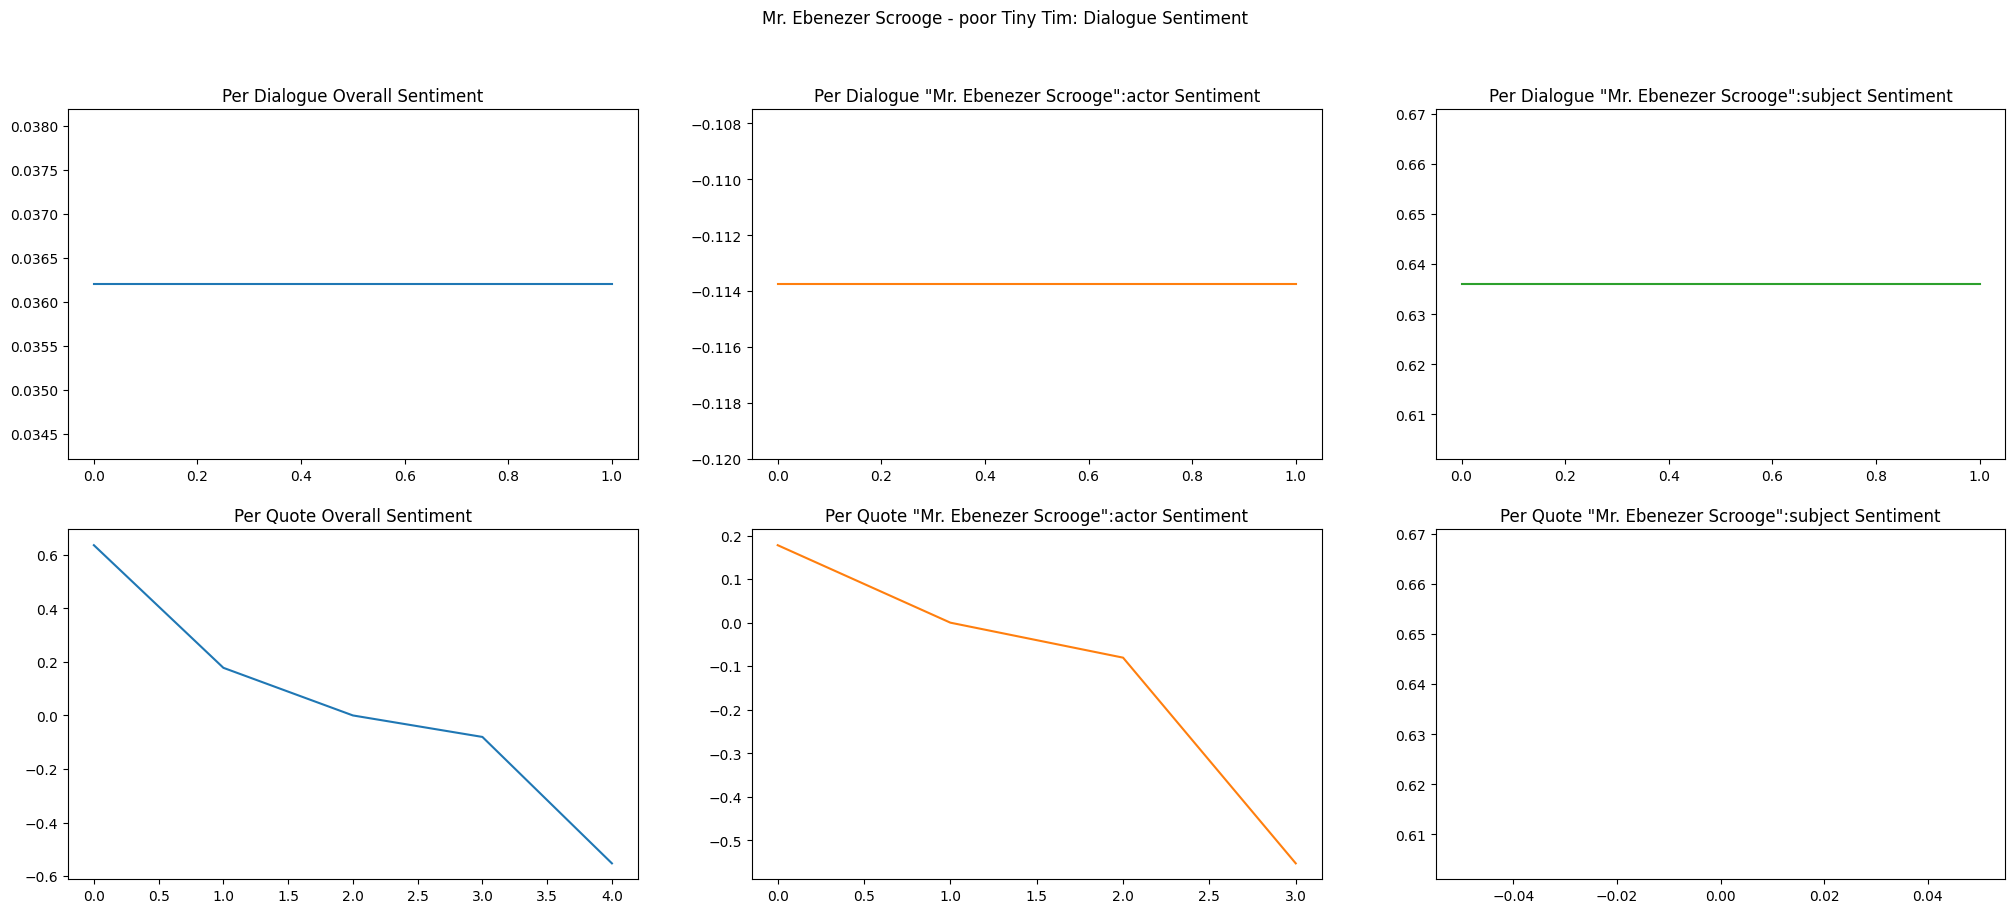

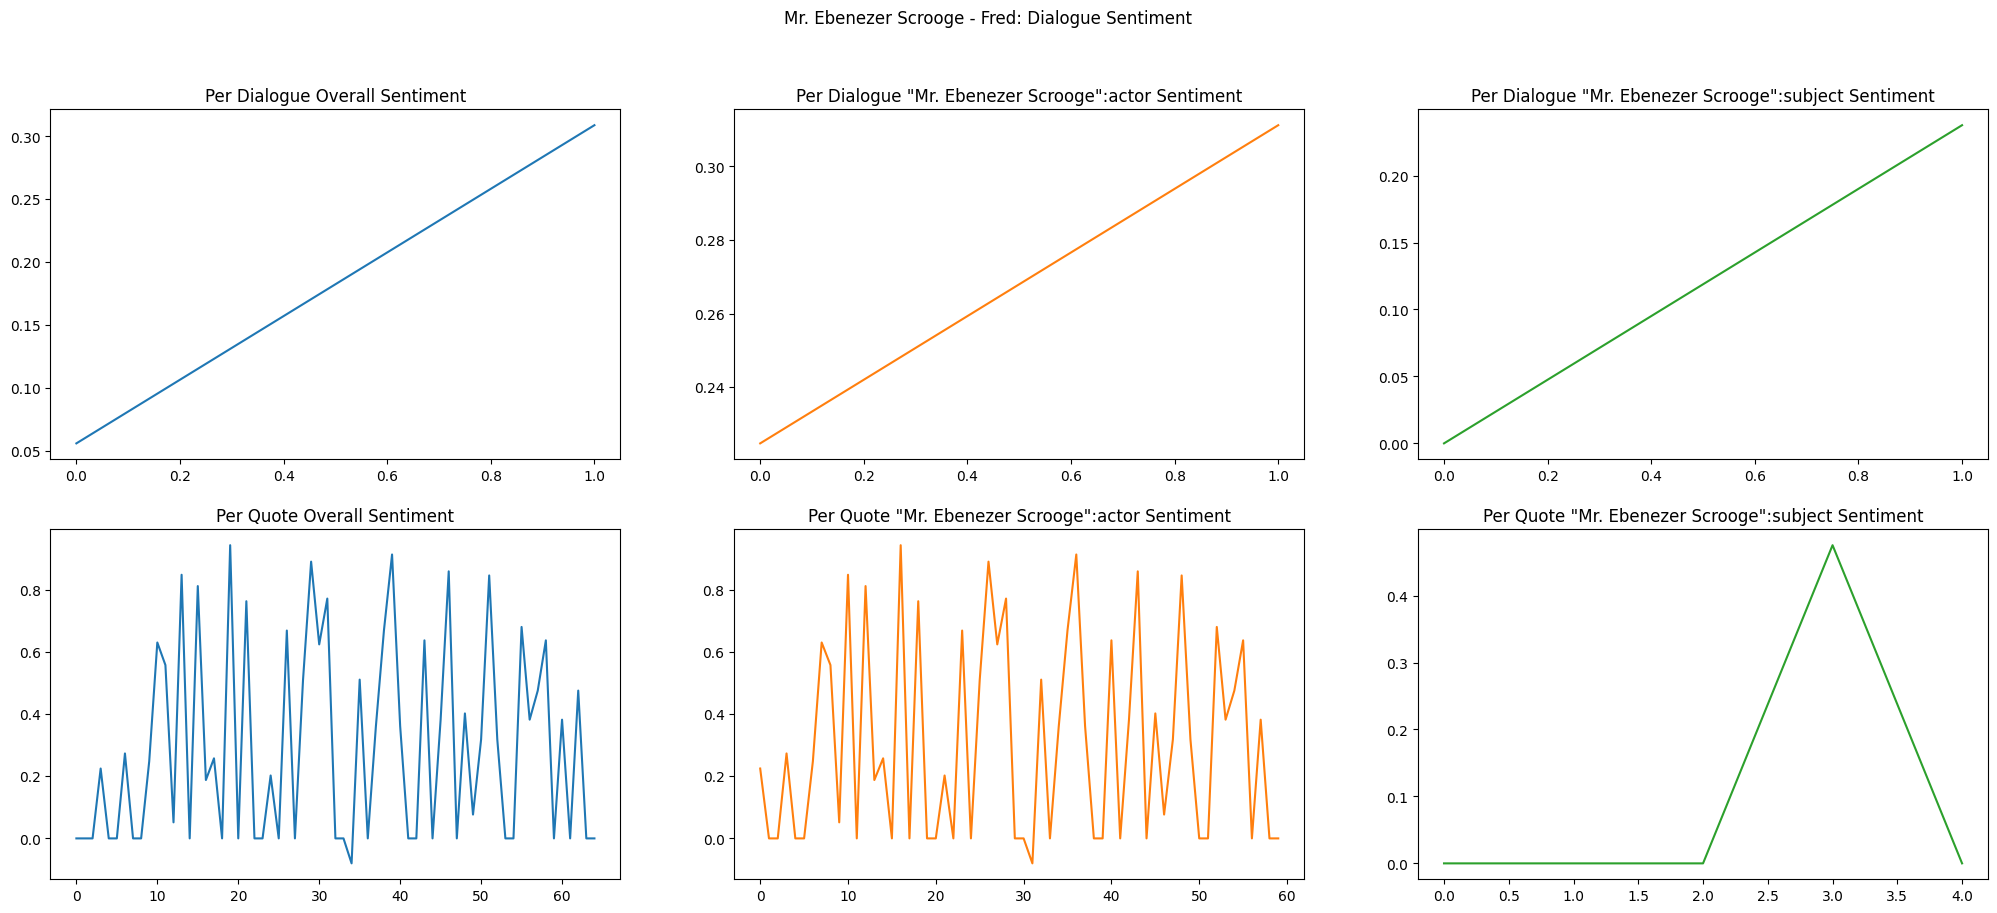

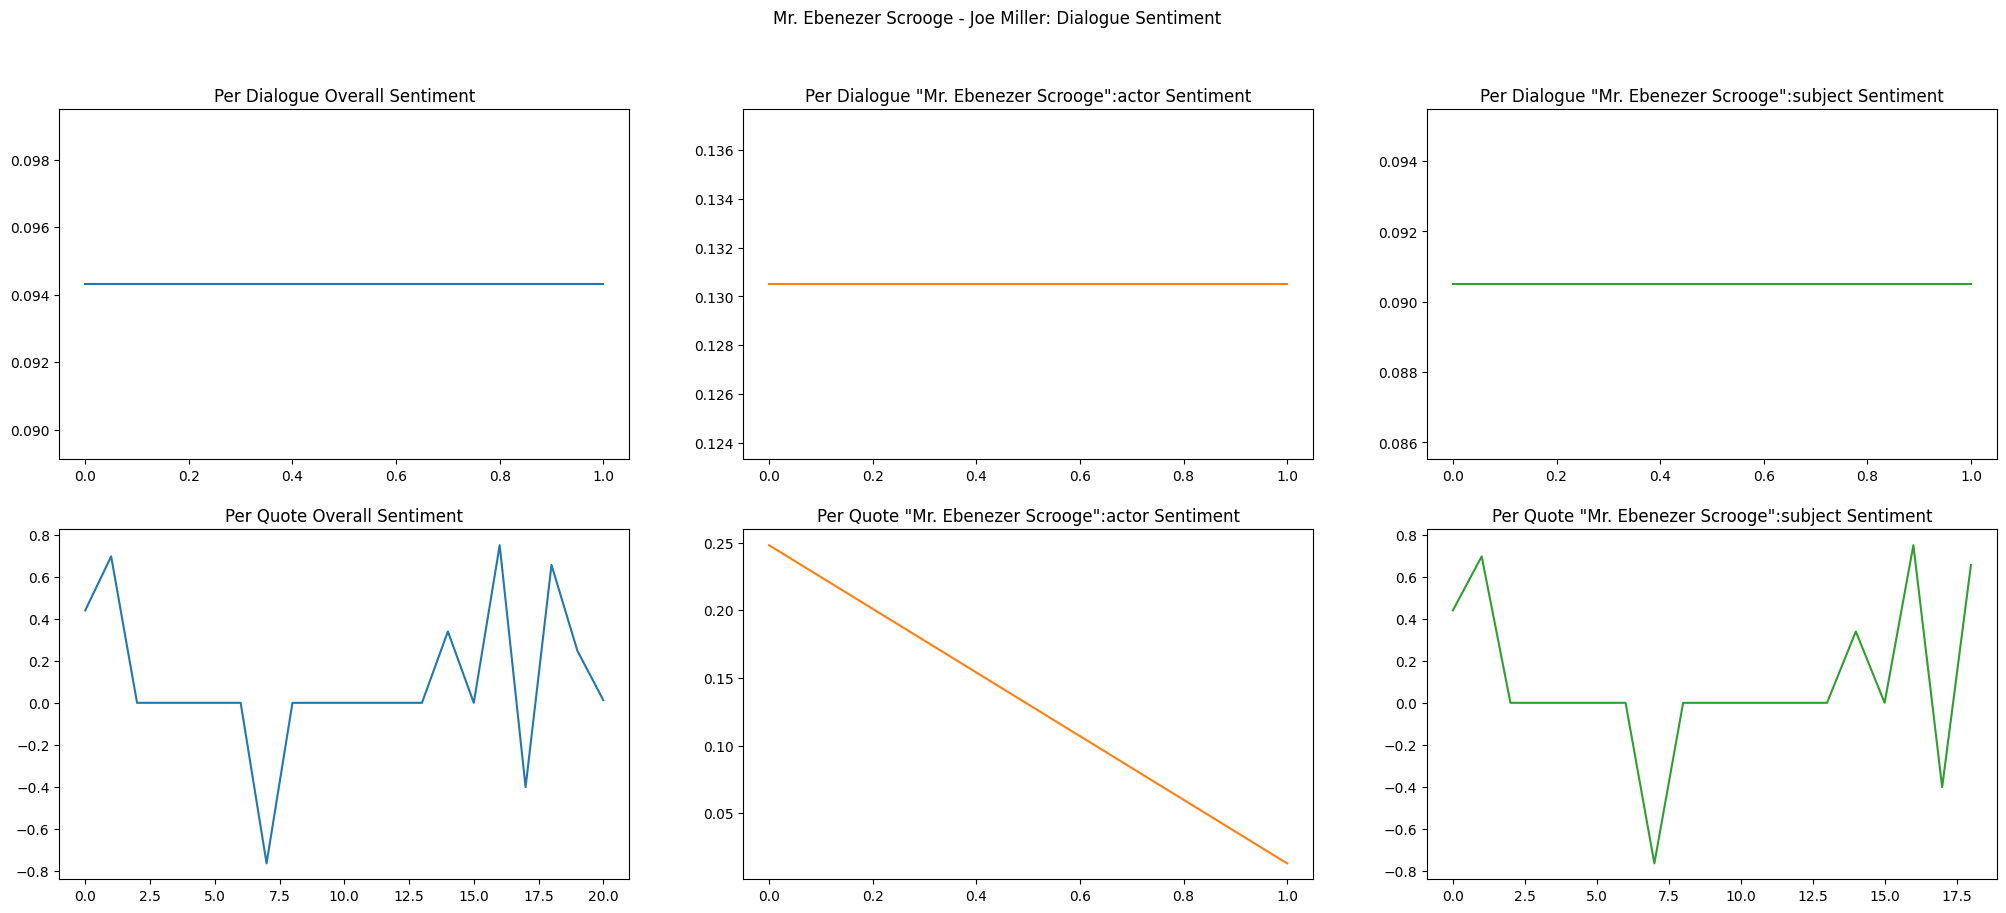

In [11]:
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


char_of_interest_id = char_id_lookup_reverse[character_of_interest]

sentiment_predictor = SentimentIntensityAnalyzer()

for character in filtered_other_characters:
    char_id = char_id_lookup_reverse[character]
    per_dialogue_overall_sentiment = []
    per_dialogue_coi_actor_sentiment = []
    per_dialogue_coi_subject_sentiment = []

    per_quote_overall_sentiment = []
    per_quote_coi_actor_sentiment = []
    per_quote_coi_subject_sentiment = []
    
    for dialogue in filtered_dialogues:
        if char_id not in dialogue.involved_characters:
            continue

        sent_overall = []
        sent_coi_actor = []
        sent_coi_subject = []

        for quote in dialogue.quotes:
            if not quote.speaker_id == char_id and not quote.speaker_id == char_of_interest_id:
                continue

            polarity = sentiment_predictor.polarity_scores(quote.text)['compound']
            sent_overall.append(polarity)
            if quote.speaker_id == char_id:
                sent_coi_subject.append(polarity)
            else:
                sent_coi_actor.append(polarity)

        per_dialogue_overall_sentiment.append(sum(sent_overall) / len(sent_overall))
        per_dialogue_coi_actor_sentiment.append(sum(sent_coi_actor) / len(sent_coi_actor))
        per_dialogue_coi_subject_sentiment.append(sum(sent_coi_subject) / len(sent_coi_subject))

        per_quote_overall_sentiment.extend(sent_overall)
        per_quote_coi_actor_sentiment.extend(sent_coi_actor)
        per_quote_coi_subject_sentiment.extend(sent_coi_subject)

    if len(per_dialogue_overall_sentiment) == 1:
        per_dialogue_overall_sentiment = 2 * per_dialogue_overall_sentiment
        per_dialogue_coi_actor_sentiment = 2 * per_dialogue_coi_actor_sentiment
        per_dialogue_coi_subject_sentiment = 2 * per_dialogue_coi_subject_sentiment
    
    fig, axs = plt.subplots(2, 3)
    fig.suptitle(f'{character_of_interest} - {character}: Dialogue Sentiment')

    axis = np.arange(len(per_dialogue_overall_sentiment))
    axs[0, 0].plot(axis, per_dialogue_overall_sentiment)
    axs[0, 0].set_title('Per Dialogue Overall Sentiment')

    axis = np.arange(len(per_dialogue_coi_actor_sentiment))
    axs[0, 1].plot(axis, per_dialogue_coi_actor_sentiment, 'tab:orange')
    axs[0, 1].set_title(f'Per Dialogue "{character_of_interest}":actor Sentiment')

    axis = np.arange(len(per_dialogue_coi_subject_sentiment))
    axs[0, 2].plot(axis, per_dialogue_coi_subject_sentiment, 'tab:green')
    axs[0, 2].set_title(f'Per Dialogue "{character_of_interest}":subject Sentiment')

    axis = np.arange(len(per_quote_overall_sentiment))
    axs[1, 0].plot(axis, per_quote_overall_sentiment)
    axs[1, 0].set_title('Per Quote Overall Sentiment')

    axis = np.arange(len(per_quote_coi_actor_sentiment))
    axs[1, 1].plot(axis, per_quote_coi_actor_sentiment, 'tab:orange')
    axs[1, 1].set_title(f'Per Quote "{character_of_interest}":actor Sentiment')

    axis = np.arange(len(per_quote_coi_subject_sentiment))
    axs[1, 2].plot(axis, per_quote_coi_subject_sentiment, 'tab:green')
    axs[1, 2].set_title(f'Per Quote "{character_of_interest}":subject Sentiment')
    
    plt.show()

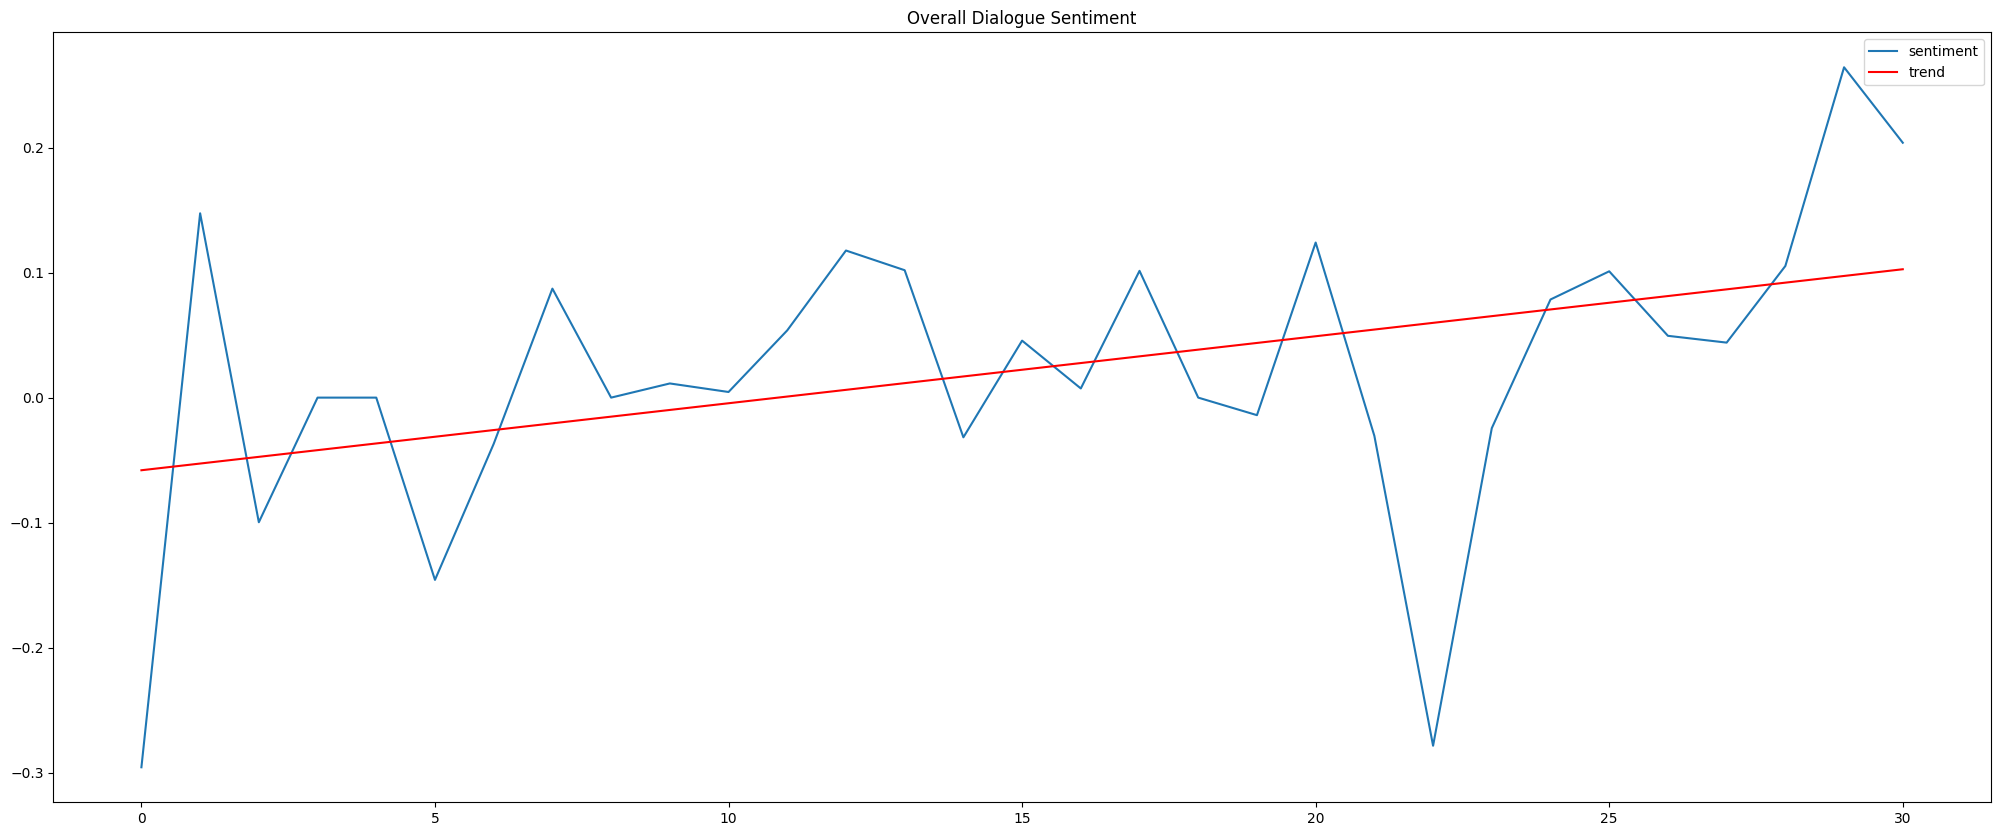

In [16]:
dialogue_sentiments = []

for dialogue in filtered_dialogues:
    sentiments = []
    for quote in dialogue.quotes:
        polarity = sentiment_predictor.polarity_scores(quote.text)['compound']
        sentiments.append(polarity)
    dialogue_sentiments.append(sum(sentiments) / len(sentiments))

x = np.arange(len(dialogue_sentiments))
slope, intercept = np.polyfit(x, dialogue_sentiments, 1)

plt.plot(x, dialogue_sentiments, label='sentiment')
plt.plot(x, slope*x + intercept, color='red', label='trend')
plt.title('Overall Dialogue Sentiment')
plt.legend()
plt.show()